In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [9]:
tab = pd.read_csv('./DoE/DoE - Results v5.csv', delimiter=',', decimal='.')
tab.head(5)

,OrdemPad,OrdemEns,N,cv,rho,p,algorithm,Cost,SL,Smax,Smin
0,470,1,5,0.25,0.7,0.00,NM,103489.4075,99.094232,"[1399.2144498433697, 1658.7649880363933, 1042....","[1201.4368902951483, 914.7239732900387, 639.58..."
1,395,2,20,0.25,0.9,0.15,GA,169395.3874,99.506135,"[19.15, 647.49, 517.56, 565.54, 956.18, 150.72...","[10.583031607135657, 44.2029800442084, 136.925..."
2,376,3,20,0.25,0.8,0.00,ACO,160969.9226,98.731990,"[270.0, 215.0, 635.0, 545.0, 520.0, 330.0, 610...","[60.0, 155.0, 560.0, 490.0, 510.0, 280.0, 185...."
3,312,4,10,0.50,0.8,0.15,ACO,100176.4338,99.330479,"[365.0, 455.0, 715.0, 155.0, 255.0, 325.0, 555...","[175.0, 260.0, 585.0, 125.0, 75.0, 155.0, 285...."
4,968,5,10,0.50,0.9,0.05,ACO,105675.7818,99.669666,"[825.0, 490.0, 935.0, 635.0, 860.0, 865.0, 395...","[435.0, 120.0, 655.0, 345.0, 770.0, 395.0, 145..."


In [10]:
TIC = tab['Cost']
alg = pd.Categorical(tab['algorithm'])
n = pd.Categorical(tab['N'])
cv = pd.Categorical(tab['cv'])
rho = pd.Categorical(tab['rho'])
p = pd.Categorical(tab['p'])

# Create a formula for the ANOVA model
formula = 'TIC ~ n * cv * rho * p * alg'

# Fit the ANOVA model
model = ols(formula, data=tab).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIC   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     81.97
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:40:57   Log-Likelihood:                -10463.
No. Observations:                 972   AIC:                         2.112e+04
Df Residuals:                     876   BIC:                         2.159e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [11]:
# show anova table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
n,5.722186e+11,2.0,1969.656403,0.000000e+00
alg,7.367869e+10,3.0,169.074889,1.829591e-86
n:alg,1.230544e+10,6.0,14.119019,2.170767e-15
cv,7.419149e+07,1.0,0.510755,4.750026e-01
n:cv,1.273607e+10,2.0,43.839346,7.152701e-19
cv:alg,1.521885e+09,3.0,3.492360,1.530750e-02
n:cv:alg,3.292851e+09,6.0,3.778151,1.011046e-03
rho,1.818855e+11,1.0,1252.150963,4.978803e-171
n:rho,2.140591e+11,2.0,736.821204,2.079804e-188
rho:alg,1.154888e+10,3.0,26.501914,2.058781e-16


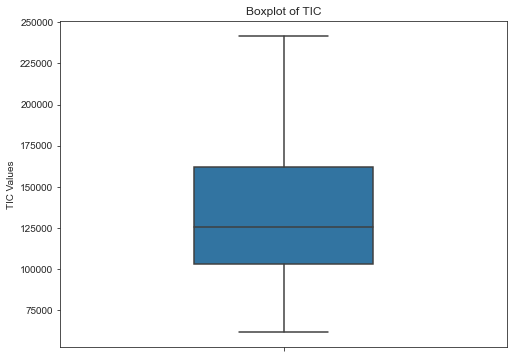

In [12]:
# Create a boxplot with seaborn
sns.set_style("ticks")
sns.color_palette("Paired", 9)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(y=TIC,  width=0.4)  # Customize colors and width


plt.title('Boxplot of TIC')
plt.ylabel('TIC Values')
plt.show()